In [11]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import optimize
import umodel as unf

import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

In [12]:
def plotResult(xEdges, postFitPOIs1, postFitPOIs2):
    
    '''
    This function plot the post-fit unfolded bins 
    versus the unfolded observables values.
    
    xEdges: 1D array with edges of observable values
    postFitPOIs: 2D array of shape (N, 3) with N POI measurment
                 with central value, negative and positive error.
    '''
    
    # Plot the result
    plt.figure(figsize=(15, 5))

    # x-data for binned-like plotting
    xUp, xDown = xEdges[1:], xEdges[:-1]
    xCenter = (xUp + xDown) / 2
    
    # Labels
    xlabels = ['cos($\\theta^{+}_{n}$)', 'cos($\\theta^{-}_{n}$)']
    
    for i, (distri1, distri2) in enumerate(zip(postFitPOIs1, postFitPOIs2)):
    
        # y-data
        vals1 = distri1[:, 0]
        errn1 = distri1[:, 1]
        errp1 = distri1[:, 2]
        vals2 = distri2[:, 0]
        errn2 = distri2[:, 1]
        errp2 = distri2[:, 2]

        # Plot figure
        plt.subplot(1, 2, i+1)
        
        # Plot data
        plt.plot(xCenter-0.05, vals1, 'o', markersize=10)
        plt.vlines(x=xCenter-0.05, ymin=vals1-errn1, ymax=vals1+errp1, color='tab:blue', label='w/o corr')
        plt.plot(xCenter+0.05, vals2, 'o', markersize=10, color='tab:red')
        plt.vlines(x=xCenter+0.05, ymin=vals2-errn2, ymax=vals2+errp2, color='tab:red', label='w/ corr')
        
        # Plot cosmetics
        plt.ylabel('Unfolded Yields')
        plt.xlabel(xlabels[i])
        plt.ylim(0, 200)
        plt.legend()
    

    
def plotErrorBarRatio(xEdges, postFitPOIs1, postFitPOIs2):
    # Plot the result
    plt.figure(figsize=(15, 5))

    # x-data for binned-like plotting
    xUp, xDown = xEdges[1:], xEdges[:-1]
    xCenter = (xUp + xDown) / 2
    
    # Labels
    xlabels = ['cos($\\theta^{+}_{n}$)', 'cos($\\theta^{-}_{n}$)']
    
    for i, (distri1, distri2) in enumerate(zip(postFitPOIs1, postFitPOIs2)):
    
        # y-data
        bar1 =  distri1[:, 2] + distri1[:, 1]
        bar2 =  distri2[:, 2] + distri2[:, 1]

        # Plot figure
        plt.subplot(1, 2, i+1)
        
        # Plot data
        plt.plot(xCenter-0.05, bar2 / bar1, 'o', markersize=10)
        
        # Plot cosmetics
        plt.ylabel('Error Bar Ratio')
        plt.xlabel(xlabels[i])
        plt.ylim(0.0, 2.0)

In [13]:
def corrFromData():
    # Loading data correlations between the two observables
    with open('../data/correlation_matrix_CosThetaNplus_CosThetaNminus_bins.json', 'r') as read_file:
        corrDict = json.load(read_file)

    n, p = rm.shape[0], rp.shape[0]
    corr = np.zeros((n+p, n+p))
    for i, (iName, line) in enumerate(corrDict.items()):
        for j, (jName, c) in enumerate(line.items()):
            corr[i, j] = c
            
    return corr.astype(np.float64)

In [14]:
# Loading data cos(n, -)
with open('../data/CosThetaNminus/asimov_spinCorrelation.json', 'r') as read_file:
    dm = np.array(json.load(read_file))
    
with open('../data/CosThetaNminus/resmat_spinCorrelation.json', 'r') as read_file:
    rm = np.array(json.load(read_file))

    
# Loading data cos(n, +)
with open('../data/CosThetaNplus/asimov_spinCorrelation.json', 'r') as read_file:
    dp = np.array(json.load(read_file))
    
with open('../data/CosThetaNplus/resmat_spinCorrelation.json', 'r') as read_file:
    rp = np.array(json.load(read_file))

In [15]:
# X values for plotting
Xs = np.array([-1.0, -0.5, 0, 0.5, 1.0])

# Dummy Y values
dp = np.array([100, 145, 145, 100])
dm = np.array([105, 140, 150, 110])
rm = np.diag([1]*4)
rp = np.diag([1]*4)

# Data for unfold model
Ds = [dp, dm]
Rs = [rp, rm]
m = unf.model(Ds, Rs, corr=np.diag([1]*8))

In [16]:
# Uncorrelated version
POIs = m.postFitUncerPOIs()

In [17]:
def getPostFit(corrMat):        
    mCorr    = unf.model(Ds, Rs, corrMat)
    POIsCorr = mCorr.postFitUncerPOIs()
    return POIsCorr

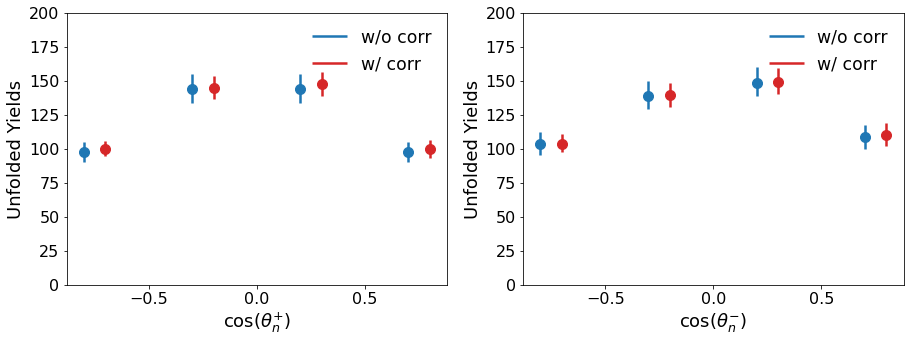

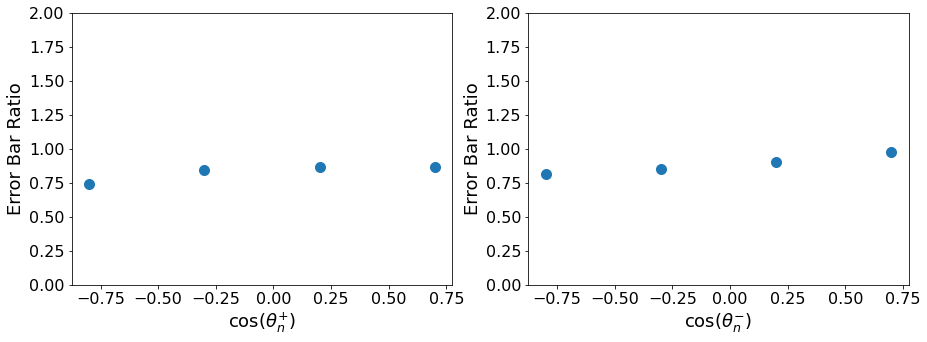

In [18]:
corr = corrFromData()
POIsCorr = getPostFit(corr)
plotResult(Xs, POIs, POIsCorr)
plotErrorBarRatio(Xs, POIs, POIsCorr)

[[1.         0.01       0.01       0.01       0.21571676 0.22864629
  0.27115666 0.43563237]
 [0.01       1.         0.01       0.01       0.2245936  0.21254978
  0.13482224 0.29882686]
 [0.01       0.01       1.         0.01       0.21594111 0.23193881
  0.18215013 0.23807449]
 [0.01       0.01       0.01       1.         0.39820323 0.27014042
  0.24334306 0.17331534]
 [0.21571676 0.2245936  0.21594111 0.39820323 1.         0.01
  0.01       0.01      ]
 [0.22864629 0.21254978 0.23193881 0.27014042 0.01       1.
  0.01       0.01      ]
 [0.27115666 0.13482224 0.18215013 0.24334306 0.01       0.01
  1.         0.01      ]
 [0.43563237 0.29882686 0.23807449 0.17331534 0.01       0.01
  0.01       1.        ]]


/home/rmadar/cernbox/PythonDev/unfoldcorr/umodel/umodel.py:136: RuntimeWarning: invalid value encountered in sqrt
  Sigma[i, j] = self.Corr[i, j] * np.sqrt(mu[i] * mu[j])


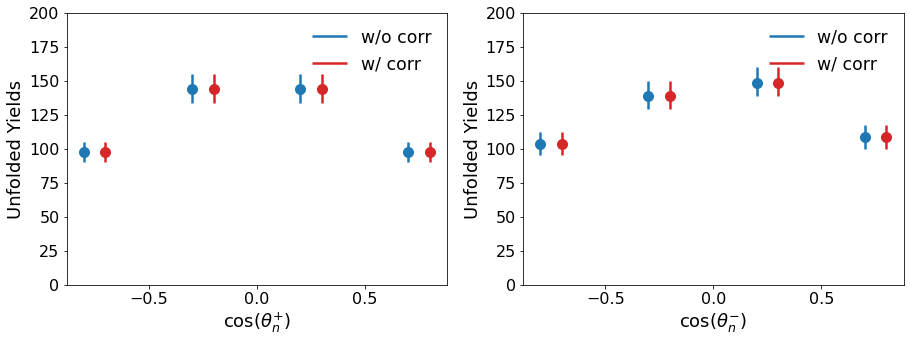

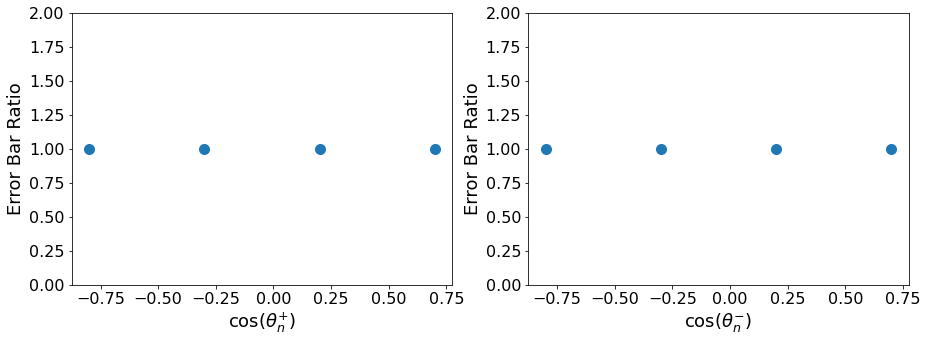

In [19]:
# Putting correlation exactly 0 between bins of the same distri
corr = corrFromData()
for i in range(0, 4):
    for j in range(0, 4):
        if i != j :
            corr[i, j] = 1e-2
            corr[i+4, j+4] = 1e-2

print(corr)
            
POIsCorr = getPostFit(corr)
plotResult(Xs, POIs, POIsCorr)
plotErrorBarRatio(Xs, POIs, POIsCorr)

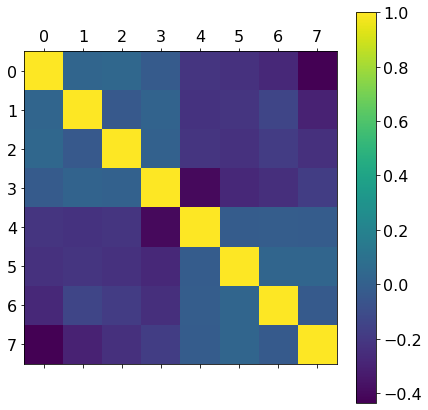

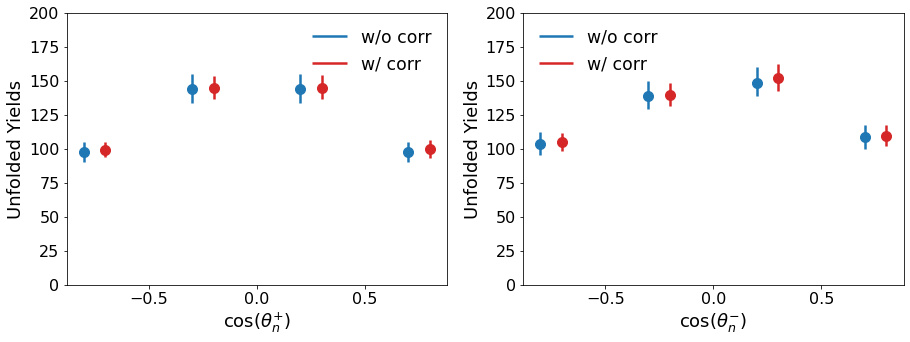

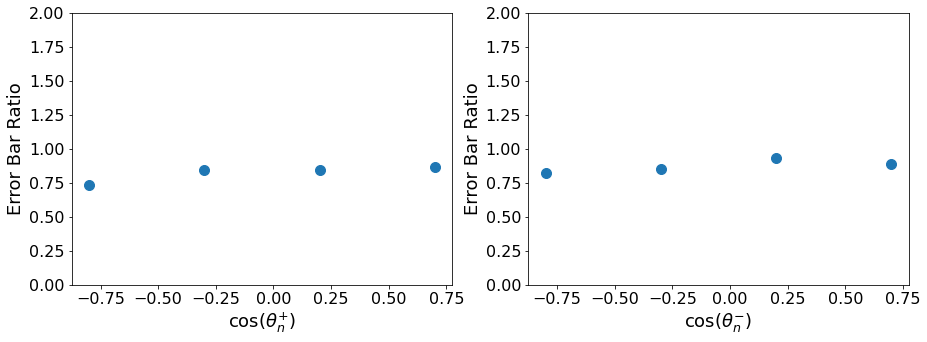

In [20]:
# Start from correlation in data
corr = corrFromData()

# Change correlation into anti-correlations
for i in range(0, 4):
    for j in range(0, 4):
            corr[i+4, j] = -corr[i+4, j]
            corr[i, j+4] = -corr[i, j+4]

plt.matshow(corr)
plt.colorbar()
POIsCorr = getPostFit(corr)
plotResult(Xs, POIs, POIsCorr)
plotErrorBarRatio(Xs, POIs, POIsCorr)

In [21]:
# Start from correlation in data
corr = corrFromData()

# Change all correlations into 40%
for i in range(0, 4):
    for j in range(0, 4):
            corr[i+4, j] = 0.35
            corr[i, j+4] = 0.35

#plt.matshow(corr)
#plt.colorbar()
POIsCorr = getPostFit(corr)
plotResult(Xs, POIs, POIsCorr)
plotErrorBarRatio(Xs, POIs, POIsCorr)

/home/rmadar/cernbox/PythonDev/unfoldcorr/umodel/umodel.py:136: RuntimeWarning: invalid value encountered in sqrt
  Sigma[i, j] = self.Corr[i, j] * np.sqrt(mu[i] * mu[j])


POI=9.31e+00 is not kept (fit didn't converge)
POI=9.53e+00 is not kept (fit didn't converge)
POI=9.76e+00 is not kept (fit didn't converge)
POI=9.99e+00 is not kept (fit didn't converge)
POI=1.02e+01 is not kept (fit didn't converge)
POI=1.04e+01 is not kept (fit didn't converge)
POI=1.07e+01 is not kept (fit didn't converge)
POI=1.09e+01 is not kept (fit didn't converge)
POI=1.11e+01 is not kept (fit didn't converge)


TypeError: Improper input: N=4 must not exceed M=1